In [96]:
from tensorflow import keras
import os
from tqdm import tqdm
import shutil
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, Flatten, Rescaling
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model, Sequential
import matplotlib.pyplot as plt
import numpy as np

In [97]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [98]:
y_train = tf.one_hot(y_train, 10)
y_test = tf.one_hot(y_test, 10)

Sequential

In [99]:
mnist_model = Sequential([
    Input(shape = (28, 28, 1)),
    Conv2D(16, 3, activation='relu'),
    MaxPooling2D(2),
    Flatten(),
    Dense(10, activation='softmax')
])

In [100]:
mnist_model.compile(
    loss='categorical_crossentropy',
    metrics='accuracy',
    optimizer='adam'
)

In [103]:
mnist_model.fit(x_train, y_train, epochs = 1, validation_data=(x_test, y_test))

1875/1875 [==============================] - 6s 3ms/step - loss: 0.1015 - accuracy: 0.9704 - val_loss: 0.1007 - val_accuracy: 0.9704


Functional API

In [104]:
num_filters = 3
epochs = 3

In [105]:
input_layer = Input(shape = (28, 28, 1))
conv2d = Conv2D(num_filters, 3, activation='relu')(input_layer)
pooling2d = MaxPooling2D(2)(conv2d)
flatten = Flatten()(pooling2d)
dense = Dense(10, activation='softmax')(flatten)

functional_model = Model(inputs = [input_layer], outputs = [dense])

In [106]:
functional_model.compile(
    loss='categorical_crossentropy',
    metrics='accuracy',
    optimizer='adam'
)

In [107]:
functional_model.fit(x_train, y_train, epochs=epochs, validation_data = (x_test, y_test))

Epoch 1/3
1875/1875 [==============================] - 6s 3ms/step - loss: 5.2601 - accuracy: 0.8374 - val_loss: 0.8115 - val_accuracy: 0.8962
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4317 - accuracy: 0.9115 - val_loss: 0.2623 - val_accuracy: 0.9258
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2118 - accuracy: 0.9377 - val_loss: 0.1892 - val_accuracy: 0.9435


In [108]:
intermediate_layers = functional_model.layers[1:-2]
input_layers = functional_model.layers[0]

intermediate_model = Model(inputs = input_layer, outputs = [conv2d, pooling2d])

In [109]:
num_images = 5

In [110]:
visualized_outputs = intermediate_model.predict(x_test[0:num_images])

1/1 [==============================] - 0s 33ms/step


In [111]:
x_test[0].shape

(28, 28)

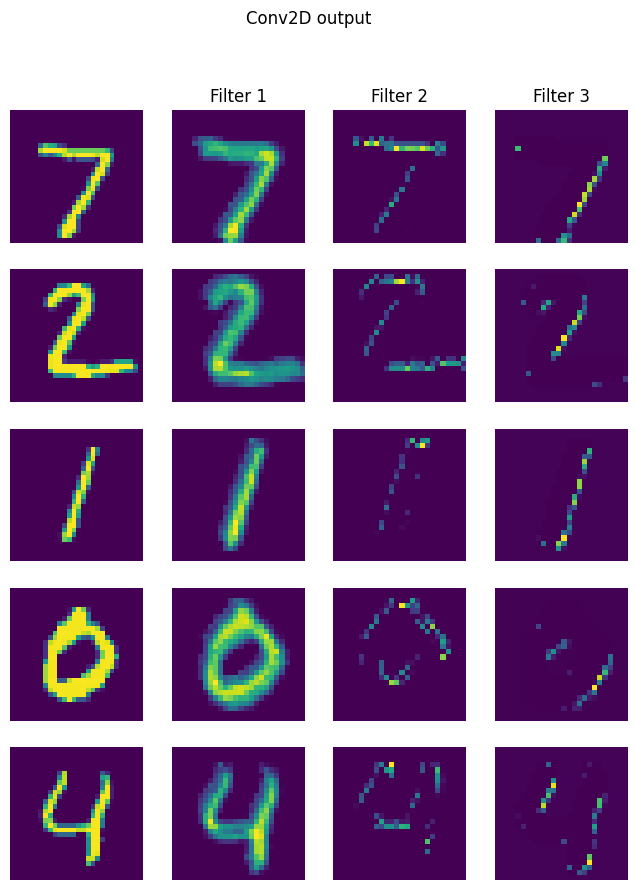

In [112]:
fig, ax = plt.subplots(num_images, num_filters + 1, figsize=((num_filters + 1) * 2, num_images * 2))

for num in range(0, num_images):
    ax[num][0].imshow(x_test[num], cmap='viridis')
    ax[num][0].axis('off')
    # Iterate over the filters and plot each one
    for i in range(1, num_filters + 1):
        ax[num][i].imshow(visualized_outputs[0][num][:, :, i - 1    ], cmap='viridis')
        ax[num][i].axis('off')
        if num == 0:
            ax[num][i].set_title(f'Filter {i}')

    plt.suptitle('Conv2D output')
plt.show()
